# NBACK_CLASSIFICATION BRANCH 

In [91]:
from glob import glob as glob
import numpy as np
from nback import *

from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
stsize = 20
depth = 30
nback = 3
ML = MetaLearner(stsize=stsize,depth=depth,nback=nback,KERAS_RNN=False)

explicit unroll


In [124]:
%%timeit
trainer = Trainer(ML)
trainer.train_loop(2000,200)
eval_loss,eval_acc = trainer.eval_loop(300)

0.0 0.71813464
0.05 0.6386794
0.1 0.659564
0.15 0.53791505
0.2 0.69179446
0.25 0.33427006
0.3 0.4038514
0.35 0.13728787
0.4 0.32920653
0.45 0.049962424
0.5 0.31555098
0.55 0.08523183
0.6 0.27641073
0.65 0.009617275
0.7 0.7923535
0.75 0.15409845
0.8 0.88190234
0.85 0.004108576
0.9 1.4483871
0.95 0.7011797
0.0 0.60503745
0.05 0.25161526
0.1 0.3805889
0.15 0.059749167
0.2 0.042674646
0.25 0.14377196
0.3 0.08568438
0.35 0.2679012
0.4 2.666699
0.45 0.3294261
0.5 0.5797363
0.55 0.42294636
0.6 0.49288642
0.65 0.35007063
0.7 0.18133946
0.75 0.05596579
0.8 0.6996854
0.85 0.0576885
0.9 0.4240309
0.95 0.29974514
0.0 0.049255952
0.05 0.010457534
0.1 1.0773661
0.15 0.066571735
0.2 0.9466989
0.25 0.008241998
0.3 0.70369846
0.35 0.18561353
0.4 1.1552557
0.45 0.09111157
0.5 0.30292767
0.55 0.26730913
0.6 0.06324968
0.65 0.3761421
0.7 0.43367526
0.75 0.0042323614
0.8 0.46457538
0.85 0.0015223627
0.9 1.7517434
0.95 0.5313357
0.0 1.5427148
0.05 0.37753007
0.1 0.6620177
0.15 0.22587919
0.2 0.3519448
0.25 

In [126]:
stsize = 20
depth = 30
nback = 3
MLK = MetaLearner(stsize=stsize,depth=depth,nback=nback,KERAS_RNN=True)

RNN KERAS


In [127]:
%%timeit
trainer = Trainer(MLK)
trainer.train_loop(2000,200)
eval_loss,eval_acc = trainer.eval_loop(300)

0.0 0.6960714
0.05 0.69604033
0.1 0.65046686
0.15 0.66374767
0.2 0.65365314
0.25 0.3903118
0.3 0.7108011
0.35 0.4484434
0.4 0.6583546
0.45 0.40335563
0.5 0.9732231
0.55 0.3925482
0.6 0.7204583
0.65 0.38079724
0.7 0.6467264
0.75 0.1005797
0.8 0.7391884
0.85 0.59550357
0.9 0.2499515
0.95 0.098397724
0.0 0.6565306
0.05 0.61176276
0.1 0.60459614
0.15 0.5850332
0.2 0.4629565
0.25 0.35932103
0.3 0.66510606
0.35 0.50171196
0.4 1.0959023
0.45 0.51628786
0.5 0.48273242
0.55 0.30513832
0.6 0.44418296
0.65 0.6126425
0.7 0.34305567
0.75 0.37329128
0.8 0.6727682
0.85 0.19709201
0.9 0.7321083
0.95 0.23074572
0.0 1.7178193
0.05 0.6507656
0.1 0.5042191
0.15 0.013499833
0.2 1.2326609
0.25 0.07178915
0.3 0.95050514
0.35 0.055234738
0.4 0.75733775
0.45 0.35224217
0.5 0.7303897
0.55 0.42713672
0.6 0.52844346
0.65 0.67261803
0.7 1.2274685
0.75 0.38842717
0.8 0.82763743
0.85 0.40074518
0.9 0.94064575
0.95 0.03771539
0.0 0.3517637
0.05 0.23395726
0.1 0.06866478
0.15 0.5481183
0.2 1.1421005
0.25 0.24764065
0.

### depth matters
- 3back+10depth=nogood
- 3back+20depth=good
- when sweeping nback keep in mind depth might interact. that is, larger nback might require more depth to perform at same level

# sweep stsize and nback

In [ ]:
ax.set_x

2 10
0.0 0.70747775
0.05 0.5977656
0.1 0.675025
0.15 0.6567461
0.2 0.63902885
0.25 0.5608484
0.3 0.5987442
0.35 0.7345259
0.4 0.6349014
0.45 0.5761808
0.5 0.5762552
0.55 0.568868
0.6 0.62329286
0.65 0.544785
0.7 0.5328743
0.75 0.5900097
0.8 0.58719885
0.85 0.47610122
0.9 0.54821527
0.95 0.5296448
2 20
0.0 0.69048893
0.05 0.5999741
0.1 0.58404285
0.15 0.7017109
0.2 0.6263737
0.25 0.5747157
0.3 0.5879179
0.35 0.64593387
0.4 0.46817812
0.45 0.48490673
0.5 0.4789421
0.55 0.54546845
0.6 0.545894
0.65 0.47300404
0.7 0.43341884
0.75 0.4089891
0.8 0.34790245
0.85 0.3526938
0.9 0.23554416
0.95 0.14630003


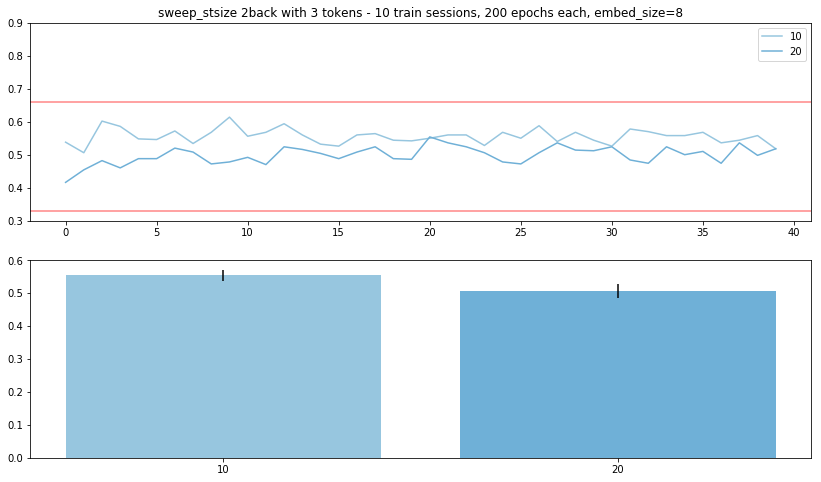

In [140]:
for nback in range(2,3):
  fig,axarr = plt.subplots(2,1,figsize=(14,8));axarr=axarr.reshape(-1)
  for idx in range(1,3):
    stsize=idx*10
    print(nback,stsize)
    ML = MetaLearner(stsize=stsize,depth=40,nback=nback)
    trainer=Trainer(ML)
    trainer.train_loop(200,200)
    eval_loss,eval_acc = trainer.eval_loop(500)
    axarr[0].plot(eval_acc.mean(0),c=plt.get_cmap('Blues')((idx+3)*25),label=stsize)
    eval_acc = eval_acc[:,10:]
    axarr[1].bar(idx-1,eval_acc.mean(),yerr=eval_acc.mean(0).std(),color=plt.get_cmap('Blues')((idx+3)*25))
    axarr[1].set_xticks(range(2))
    axarr[1].set_xticklabels(range(10,21,10))
    axarr[0].set_ylim(.3,.9)
    axarr[0].axhline(0.66,c='red',lw=.4)
    axarr[0].axhline(0.33,c='red',lw=.4)
  axarr[0].set_title('sweep_stsize %iback with 3 tokens - 10 train sessions, 200 epochs each, embed_size=8'%(nback))
  axarr[0].legend()
#   plt.savefig('figures/bar+line-sweep_stsize-%iback'%nback)
#   plt.close('all')

10 2
randomizing params
0.0 0.72033316
0.05 0.58277565
0.1 0.5223556
0.15 0.64995843
0.2 0.60652506
0.25 0.65121543
0.3 0.56091887
0.35 0.6400081
0.4 0.55707204
0.45 0.47882655
0.5 0.5111644
0.55 0.525055
0.6 0.38010982
0.65 0.49322402
0.7 0.6146209
0.75 0.4191911
0.8 0.48156634
0.85 0.42545673
0.9 0.26071462
0.95 0.37231168
0.0 0.5938489
0.05 0.6694824
0.1 0.64257723
0.15 0.51166075
0.2 0.54767275
0.25 0.46300557
0.3 0.46352646
0.35 0.44698322
0.4 0.4473397
0.45 0.49588802
0.5 0.48034078
0.55 0.32370305
0.6 0.35509482
0.65 0.3603209
0.7 0.2984862
0.75 0.29416382
0.8 0.21938163
0.85 0.2738558
0.9 0.19044663
0.95 0.13665058
0.0 0.4034297
0.05 0.23583704
0.1 0.1503797
0.15 0.13605098
0.2 0.20479631
0.25 0.10677834
0.3 0.14296833
0.35 0.17336838
0.4 0.160674
0.45 0.115216926
0.5 0.19217438
0.55 0.054603122
0.6 0.04808823
0.65 0.26859254
0.7 0.060179666
0.75 0.11437149
0.8 0.07941964
0.85 0.088742726
0.9 0.1288772
0.95 0.008608319
0.0 0.29450688
0.05 0.21384807
0.1 0.14168811
0.15 0.114565

0.55 0.56536156
0.6 0.64790624
0.65 0.5943032
0.7 0.63175726
0.75 0.5986814
0.8 0.5261535
0.85 0.63727856
0.9 0.616742
0.95 0.5727972
0.0 0.58574694
0.05 0.6140465
0.1 0.6729439
0.15 0.61681294
0.2 0.51415515
0.25 0.6491937
0.3 0.68704844
0.35 0.61870927
0.4 0.56783587
0.45 0.5154938
0.5 0.60179436
0.55 0.7046986
0.6 0.5656885
0.65 0.6323629
0.7 0.6178387
0.75 0.6168525
0.8 0.5393661
0.85 0.55866003
0.9 0.57413745
0.95 0.58776283
0.0 0.56598246
0.05 0.61182934
0.1 0.63498783
0.15 0.67136824
0.2 0.52823836
0.25 0.61334383
0.3 0.57126546
0.35 0.5605242
0.4 0.52394545
0.45 0.5687288
0.5 0.5334718
0.55 0.55991006
0.6 0.6344036
0.65 0.52053624
0.7 0.6179669
0.75 0.4300885
0.8 0.66800797
0.85 0.51197773
0.9 0.51875013
0.95 0.48019725
0.0 0.7205927
0.05 0.62534213
0.1 0.54252756
0.15 0.5260514
0.2 0.5671502
0.25 0.50702786
0.3 0.5343716
0.35 0.5090435
0.4 0.54627854
0.45 0.47355846
0.5 0.48713565
0.55 0.5219981
0.6 0.51826483
0.65 0.43611714
0.7 0.52904516
0.75 0.4691743
0.8 0.52839845
0.85 0

0.5 0.113869086
0.55 0.00210983
0.6 0.0018682149
0.65 0.0015834443
0.7 0.0013623122
0.75 0.03260267
0.8 0.0014650349
0.85 0.00062897673
0.9 0.005177899
0.95 0.0006698716
0.0 0.19009617
0.05 0.02244411
0.1 0.08244249
0.15 0.08714554
0.2 0.14955069
0.25 0.04412764
0.3 0.04829174
0.35 0.006589955
0.4 0.001042129
0.45 0.0028414489
0.5 0.00056558585
0.55 0.0005012137
0.6 0.06345145
0.65 0.011957433
0.7 0.0018674586
0.75 0.16706158
0.8 0.0025620735
0.85 0.00078847824
0.9 0.07016232
0.95 0.10646922
0.0 1.1210678
0.05 0.38005874
0.1 0.38529652
0.15 0.23951809
0.2 0.26404253
0.25 0.082482845
0.3 0.1487399
0.35 0.033591285
0.4 0.017142441
0.45 0.20642626
0.5 0.00869565
0.55 0.0083994465
0.6 0.004080732
0.65 0.0017450323
0.7 0.0034170619
0.75 0.10491988
0.8 0.011433227
0.85 0.11512228
0.9 0.0007979679
0.95 0.0035807646
0.0 0.35068986
0.05 0.022139348
0.1 0.051533714
0.15 0.0130243115
0.2 0.121540934
0.25 0.026000686
0.3 0.15798949
0.35 0.07667716
0.4 0.16748829
0.45 0.3374304
0.5 0.001157852
0.55

0.95 0.4202044
30 5
randomizing params
0.0 0.6460734
0.05 0.5734005
0.1 0.6796575
0.15 0.681763
0.2 0.6264318
0.25 0.6883859
0.3 0.6071361
0.35 0.55746263
0.4 0.6889716
0.45 0.5228626
0.5 0.66450715
0.55 0.5928008
0.6 0.66541106
0.65 0.57701963
0.7 0.6696358
0.75 0.6639856
0.8 0.7134244
0.85 0.6563484
0.9 0.6539492
0.95 0.7079678
0.0 0.6477786
0.05 0.74293727
0.1 0.59104466
0.15 0.588032
0.2 0.62939996
0.25 0.68907136
0.3 0.5802563
0.35 0.63447165
0.4 0.6747335
0.45 0.6165828
0.5 0.67235696
0.55 0.6491081
0.6 0.55210453
0.65 0.6370924
0.7 0.6451026
0.75 0.57271403
0.8 0.6301697
0.85 0.63906306
0.9 0.55441344
0.95 0.6189293
0.0 0.6363363
0.05 0.6304354
0.1 0.627287
0.15 0.6503675
0.2 0.59558815
0.25 0.61354136
0.3 0.6442734
0.35 0.6886378
0.4 0.602556
0.45 0.6389743
0.5 0.5494975
0.55 0.5907289
0.6 0.5701253
0.65 0.46729946
0.7 0.6271025
0.75 0.6808711
0.8 0.48383793
0.85 0.60116935
0.9 0.556609
0.95 0.6291349
0.0 0.6064544
0.05 0.5914967
0.1 0.64717054
0.15 0.59263206
0.2 0.6937934
0.2

0.8 0.00048908294
0.85 0.11542345
0.9 0.00051162497
0.95 0.013793682
0.0 0.5187731
0.05 0.011183915
0.1 0.014699614
0.15 0.012293068
0.2 0.30170524
0.25 0.08502181
0.3 0.26306903
0.35 0.33053797
0.4 0.1377769
0.45 0.14506088
0.5 0.00036453566
0.55 0.0008824291
0.6 0.18243107
0.65 0.0005578047
0.7 0.000592404
0.75 0.014141918
0.8 0.16463393
0.85 0.00037418847
0.9 0.10830651
0.95 0.15999278
0.0 0.8654602
0.05 0.6806719
0.1 0.42126125
0.15 0.5193658
0.2 0.32374233
0.25 0.40583584
0.3 0.29107228
0.35 0.065847754
0.4 0.22526549
0.45 0.16852419
0.5 0.014310124
0.55 0.07275157
0.6 0.14237678
0.65 0.33632717
0.7 0.0025146366
0.75 0.21343504
0.8 0.00077571976
0.85 0.015571927
0.9 0.035276607
0.95 0.079983436
0.0 1.704693
0.05 0.23024552
0.1 0.08923442
0.15 0.038369294
0.2 0.022797527
0.25 0.11463111
0.3 0.08883186
0.35 0.095738746
0.4 0.07842303
0.45 0.019058585
0.5 0.088872574
0.55 0.0010887176
0.6 0.021464853
0.65 0.091951095
0.7 0.07959304
0.75 0.0010452546
0.8 0.18478966
0.85 0.044938102
0.

0.5 0.5736127
0.55 0.5474402
0.6 0.70273924
0.65 0.62731653
0.7 0.56588835
0.75 0.5718666
0.8 0.6046495
0.85 0.6539392
0.9 0.616494
0.95 0.5756989
0.0 0.6109998
0.05 0.64089894
0.1 0.6544483
0.15 0.6453091
0.2 0.62995166
0.25 0.630791
0.3 0.6807848
0.35 0.63047236
0.4 0.6400651
0.45 0.6577379
0.5 0.56748223
0.55 0.6697557
0.6 0.52715445
0.65 0.642949
0.7 0.6259285
0.75 0.62835026
0.8 0.64554787
0.85 0.6726745
0.9 0.62495726
0.95 0.61222553
0.0 0.5949235
0.05 0.6433246
0.1 0.6427332
0.15 0.67321557
0.2 0.67692256
0.25 0.60850126
0.3 0.65461594
0.35 0.65823907
0.4 0.667815
0.45 0.6649142
0.5 0.6015745
0.55 0.7187527
0.6 0.7314598
0.65 0.6406162
0.7 0.6270373
0.75 0.6299835
0.8 0.61316836
0.85 0.7163257
0.9 0.6987869
0.95 0.65753746
0.0 0.61266977
0.05 0.60191274
0.1 0.65360487
0.15 0.6113864
0.2 0.59556204
0.25 0.6269156
0.3 0.5818804
0.35 0.6879621
0.4 0.5901035
0.45 0.6591081
0.5 0.6533889
0.55 0.70263857
0.6 0.6664334
0.65 0.5568646
0.7 0.635692
0.75 0.5299929
0.8 0.6532053
0.85 0.609

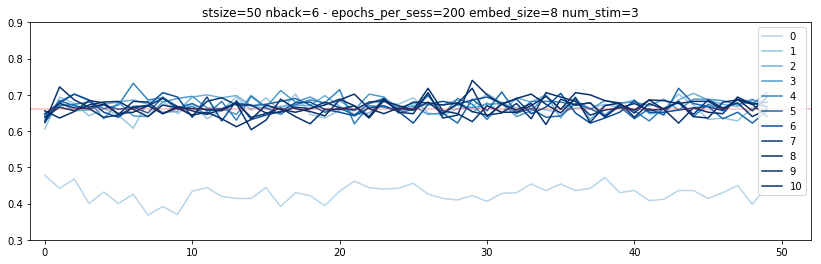

In [96]:
import itertools
for stsize,nback in itertools.product([10,30,50],[2,3,4,5,6]):
  print(stsize,nback)
  ML = MetaLearner(stsize=stsize,depth=50,nback=nback)
  trainer=Trainer(ML)

  ## train

  ML.reinitialize()
  eval_loss0,eval_acc0 = trainer.eval_loop(500)
  eval_acc_L = [eval_acc0.mean(0)]

  num_sess = 10
  for sess in range(num_sess):
    trainer.train_loop(200,200)
    eval_loss,eval_acc = trainer.eval_loop(500)
    eval_acc_L.append(eval_acc.mean(0))

  ## plotting

  plt.close('all')
  plt.figure(figsize=(14,4))
  for idx,eval_acc in enumerate(eval_acc_L):
    plt.plot(eval_acc,c=plt.get_cmap('Blues')((idx+3)*25),label=idx)
  plt.legend()
  plt.ylim(0.3,0.9)
  plt.xlim(-1,52)
  plt.axhline(0.66,c='red',lw=.4)
  plt.title('stsize=%i nback=%i - epochs_per_sess=200 embed_size=8 num_stim=3'%(stsize,nback))
  plt.savefig('figures/sweep_stsize_and_nback/stsize%i-nback%i'%(stsize,nback))

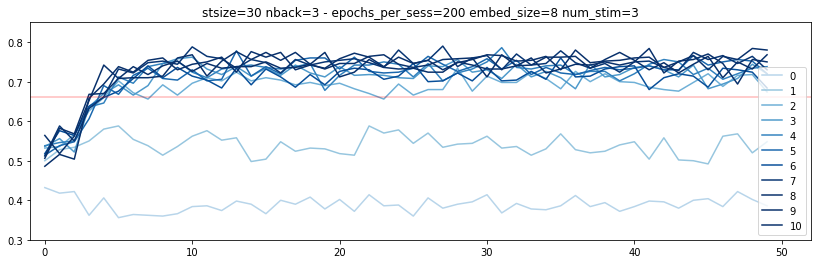

randomizing params
0.0 0.69400233
0.05 0.69395125
0.1 0.53267837
0.15 0.4391248
0.2 0.50857437
0.25 0.37305623
0.3 0.5183251
0.35 0.24692632
0.4 0.25693637
0.45 0.3201173
0.5 0.16258463
0.55 0.026911741
0.6 0.10445732
0.65 0.046751346
0.7 0.010844047
0.75 0.38287804
0.8 0.021951295
0.85 0.19541033
0.9 0.0008914414
0.95 0.23682745
0.0 1.0233749
0.05 0.0056093205
0.1 0.29148093
0.15 0.015161217
0.2 0.124396354
0.25 0.00065409415
0.3 0.08458015
0.35 0.1814464
0.4 0.0003240657
0.45 0.14554864
0.5 0.20574108
0.55 0.22687587
0.6 0.00013889065
0.65 0.34126896
0.7 0.21347883
0.75 0.4449906
0.8 0.13470471
0.85 0.22875533
0.9 0.046787623
0.95 0.00041085604
0.0 1.1095932
0.05 0.47320274
0.1 0.25278082
0.15 0.5031509
0.2 0.117975704
0.25 0.055163976
0.3 0.12773521
0.35 0.33906513
0.4 0.15782349
0.45 0.41801423
0.5 0.002133464
0.55 0.41768146
0.6 0.3232534
0.65 0.22803654
0.7 0.25305524
0.75 0.1572051
0.8 0.08138923
0.85 0.28442168
0.9 6.564862e-05
0.95 0.22047962


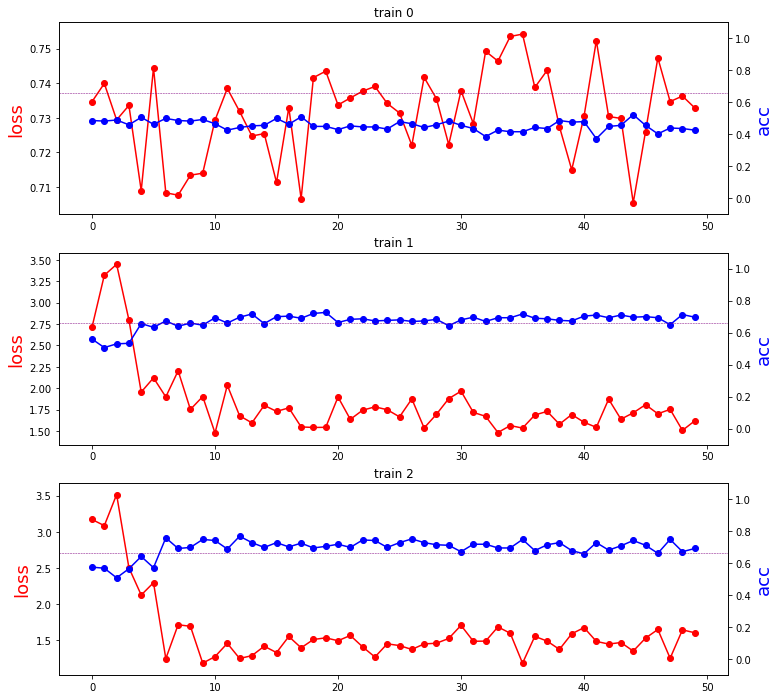

In [33]:

# eval untrained
eval_loss,eval_acc = trainer.eval_loop(300)

fig,axarr = plt.subplots(3,1,figsize=(12,4*3))
plt_loss_acc(eval_loss.mean(0),eval_acc.mean(0),ax=axarr[0],scatter=True)

for idx in range(1,3):
  ax = axarr[idx]
  # train
  trainer.train_loop(1000,1000)
  # eval
  eval_loss,eval_acc = trainer.eval_loop(300)
  # plot
  plt_loss_acc(eval_loss.mean(0),eval_acc.mean(0),ax=ax,scatter=True)
  ax.set_title('train %i'%idx)
  

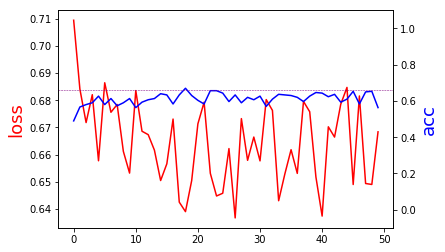

ADAM005
0.0 0.7050538
0.05 2.3608549
0.1 0.898908
0.15 2.2449524
0.2 1.8114862
0.25 2.0773842
0.3 0.72707194
0.35 2.8683896
0.4 0.9784775
0.45 0.94617677
0.5 1.6222136
0.55 2.439255
0.6 2.5468566
0.65 1.5321398
0.7 0.0018564566
0.75 1.6119839
0.8 2.0171587
0.85 0.57761
0.9 0.39927226
0.95 1.8826916


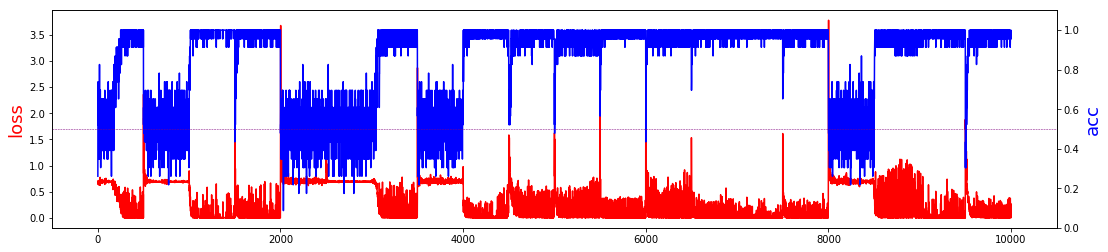

In [140]:
ML = MetaLearner(stsize=50,depth=50,nback=3)
trainer=Trainer(ML,nback=3)

plt_loss_acc(train_loss,train_acc)

## eval trained models. save eval data

In [17]:
def plt_loss_acc(plt_loss,plt_acc,scatter=False,ax=None):
#   plt.figure(figsize=(18,4))
  if ax==None: ax1 = plt.gca()
  else: ax1 = ax
  ax1.plot(plt_loss,c='r')
  ax1.set_ylabel('loss',color='red',fontsize=18)
  ax2 = ax1.twinx()
  ax2.plot(plt_acc,c='b')
  ax2.set_ylabel('acc',color='b',fontsize=18)
  ax2.set_ylim(-.1,1.1)
  ax2.axhline(0.66,c='purple',ls='--',lw=.5)
  if scatter:
    ax1.scatter(np.arange(0,len(plt_loss)),plt_loss,c='r')
    ax2.scatter(np.arange(0,len(plt_acc)),plt_acc,c='b')

In [22]:
stsize = 50
depth = 20

mdirL = glob('models/sweep_N/st*/*')
for i,fpath in enumerate(mdirL):
  print(i/len(mdirL))
  nback = int(fpath.split('/')[-2].split('_')[-1])
  midx = int(fpath.split('/')[-1])
  # load model
  fpath += '/final'
  ML = MetaLearner(stsize,depth,nback)
  ML.saver_op.restore(ML.sess,fpath)
  trainer = Trainer(ML)
  eval_loss,eval_acc = trainer.eval_loop(1000)
  np.save(fpath + "_eval_loss",eval_loss)
  np.save(fpath + "_eval_acc",eval_acc)



0.0
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_3/007/final
0.012195121951219513
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_3/000/final
0.024390243902439025
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_3/008/final
0.036585365853658534
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_3/001/final
0.04878048780487805
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_3/006/final
0.06097560975609756
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_3/003/final
0.07317073170731707
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_3/004/final
0.08536585365853659
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_3/005/final
0.0975609756097561
ADAM005
INFO:tensorflow:Re

0.8414634146341463
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_1/006/final
0.8536585365853658
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_1/003/final
0.8658536585365854
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_1/004/final
0.8780487804878049
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_1/005/final
0.8902439024390244
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_1/002/final
0.9024390243902439
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_6/007/final
0.9146341463414634
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_6/000/final
0.926829268292683
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_6/001/final
0.9390243902439024
ADAM005
INFO:tensorflo

## load eval data, plot

In [60]:
def plt_loss_acc(plt_loss,plt_acc,scatter=False,ax=None):
#   plt.figure(figsize=(18,4))
  if ax==None: ax1 = plt.gca()
  else: ax1 = ax
  ax1.plot(plt_loss,c='r')
  ax1.set_ylabel('loss',color='red',fontsize=18)
  ax2 = ax1.twinx()
  ax2.plot(plt_acc,c='b')
  ax2.set_ylabel('acc',color='b',fontsize=18)
  ax2.set_ylim(-.1,1.1)
  ax2.axhline(0.5,c='purple',ls='--',lw=.5)
  if scatter:
    ax1.scatter(np.arange(0,len(plt_loss)),plt_loss,c='r')
    ax2.scatter(np.arange(0,len(plt_acc)),plt_acc,c='b')


In [63]:
## nbacks found
nbackL = list(set([int(i.split('/')[-3].split('_')[-1]) for i in glob('models/sweep_N/st*/*/')]))


In [64]:
glob('models/sweep_N/st*/*/')

['models/sweep_N/state_50-depth_50-nback_3/007/',
 'models/sweep_N/state_50-depth_50-nback_3/000/',
 'models/sweep_N/state_50-depth_50-nback_3/008/',
 'models/sweep_N/state_50-depth_50-nback_3/001/',
 'models/sweep_N/state_50-depth_50-nback_3/006/',
 'models/sweep_N/state_50-depth_50-nback_3/003/',
 'models/sweep_N/state_50-depth_50-nback_3/004/',
 'models/sweep_N/state_50-depth_50-nback_3/005/',
 'models/sweep_N/state_50-depth_50-nback_3/002/',
 'models/sweep_N/state_50-depth_50-nback_4/007/',
 'models/sweep_N/state_50-depth_50-nback_4/000/',
 'models/sweep_N/state_50-depth_50-nback_4/001/',
 'models/sweep_N/state_50-depth_50-nback_4/006/',
 'models/sweep_N/state_50-depth_50-nback_4/003/',
 'models/sweep_N/state_50-depth_50-nback_4/004/',
 'models/sweep_N/state_50-depth_50-nback_4/005/',
 'models/sweep_N/state_50-depth_50-nback_4/002/',
 'models/sweep_N/state_50-depth_50-nback_5/007/',
 'models/sweep_N/state_50-depth_50-nback_5/000/',
 'models/sweep_N/state_50-depth_50-nback_5/001/',


In [65]:
lossL,accL = [],[]
for nback in nbackL[:1]:
  mdirL = glob('models/sweep_N/*nback_%i/*/'%nback)
  plt.figure(figsize=(18,4))
  ax = plt.gca()
  for fpath in mdirL:
    eval_loss = np.load(fpath+'final_eval_loss.npy')
    eval_acc = np.load(fpath+'final_eval_loss.npy')
    net_mean_loss = np.mean(eval_loss,0)
    net_mean_acc = np.mean(eval_acc,0)
    plt_loss_acc(net_mean_loss,net_mean_acc,scatter=True,ax=ax)
  plt.savefig('figures/sweep_N/st50-depth50_nback_%i-groupmean'%nback)
  plt.close('all')


In [72]:
np.round(eval_acc[0],1)

array([19.2,  0.7,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [33]:
mdirL = glob('models/sweep_N/st*/*/')
lossD = {}
for fpath in mdirL[:2]:
  loss_fpath = fpath + "final_eval_loss.npy"
  acc_fpath = fpath + "final_eval_loss.npy"
  nback = int(fpath.split('/')[-3].split('_')[-1])
  if nback not in lossD:
  midx = int(fpath.split('/')[-2])
  
  
np.load(loss_fpath).shape

(1000, 23)

ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_3/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_4/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_5/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_2/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_10/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_7/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_9/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_8/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_1/final
ADAM005
INFO:tensorflow:Restoring parameters from models/sweep_N/state_50-depth_50-nback_6/final


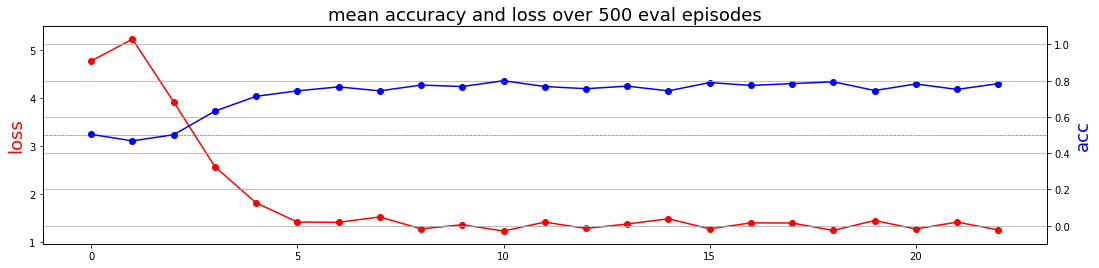

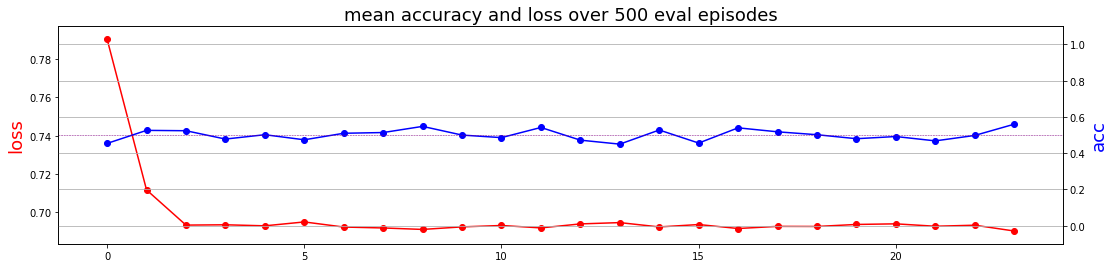

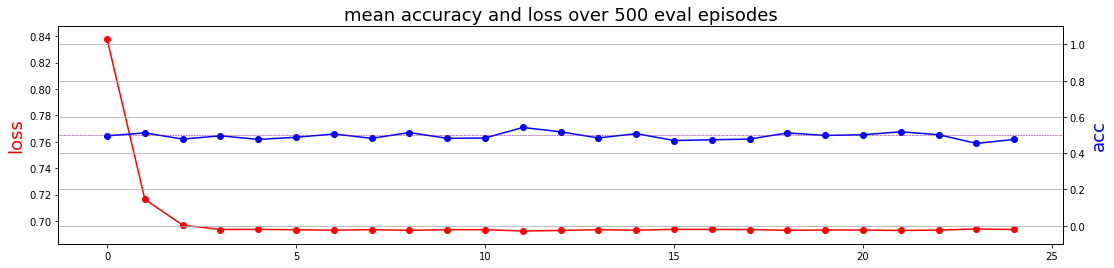

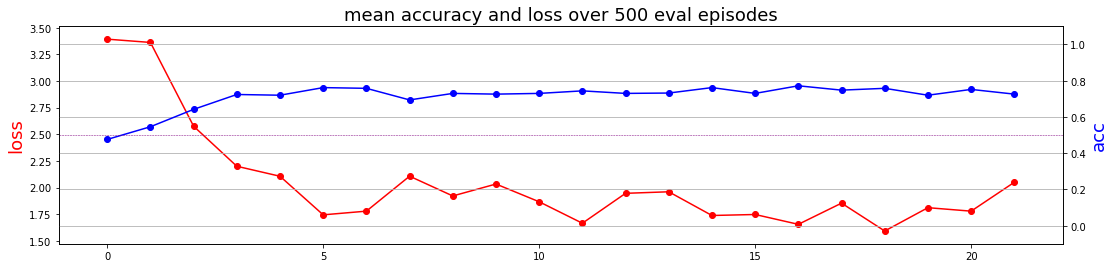

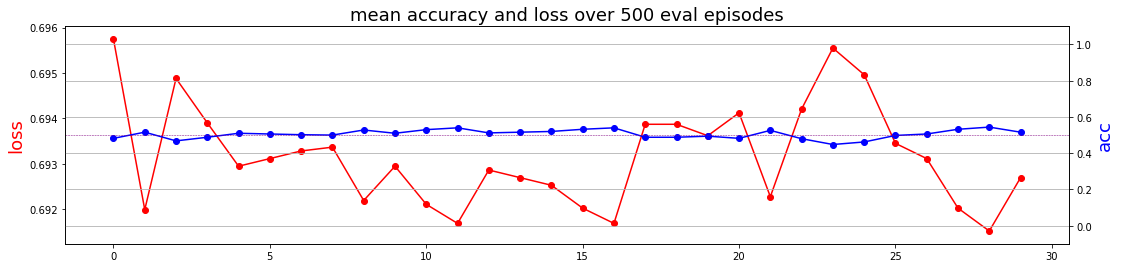

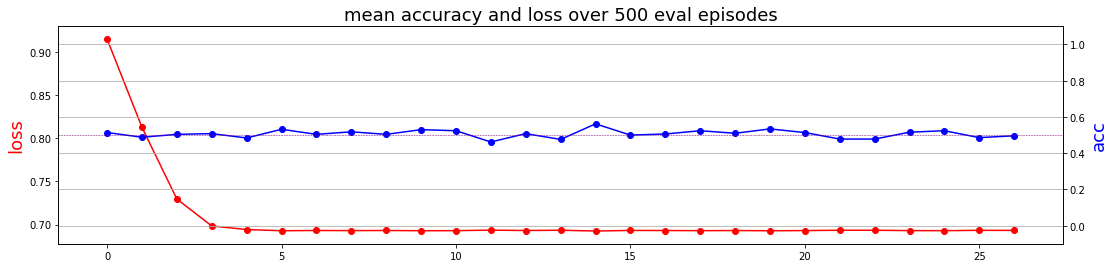

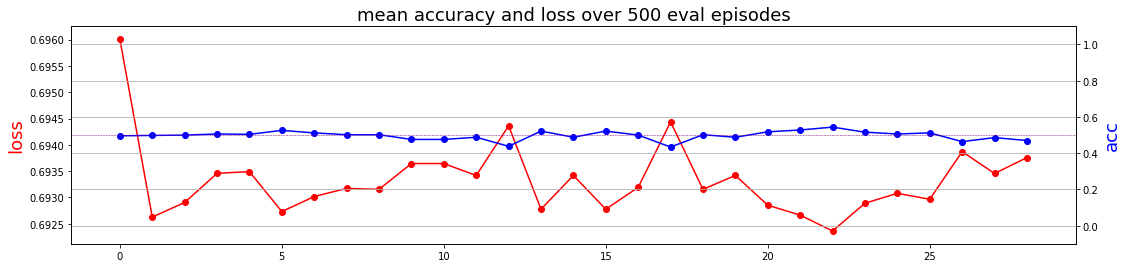

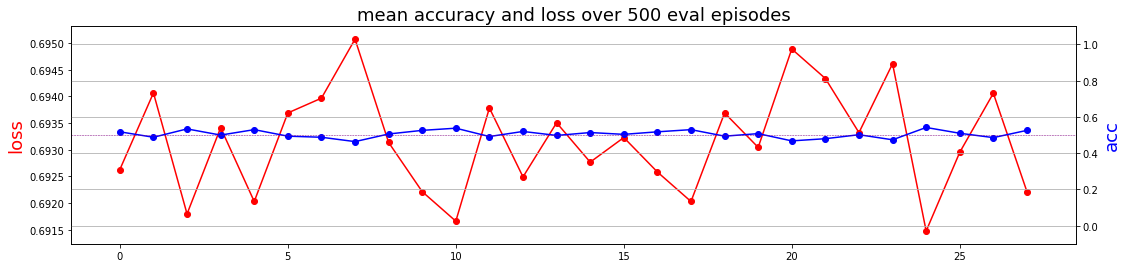

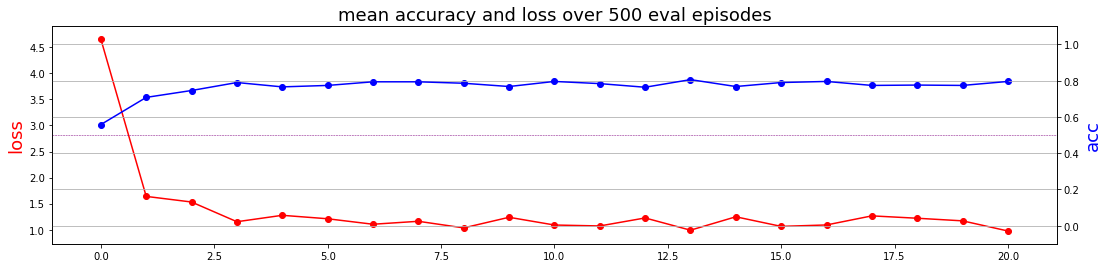

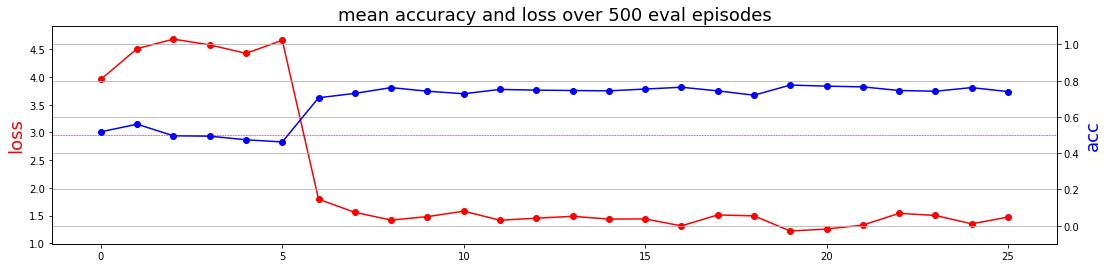

In [172]:
for fpath in mdirL:
  # load model
  nback = int(fpath.split('-')[-1].split('_')[-1])
  fpath += '/final'
  stsize = 50
  depth = 20
  ML = MetaLearner(stsize,depth,nback)
  ML.saver_op.restore(ML.sess,fpath)
  # plt and save fig
  trainer = Trainer(ML)
  eval_loss,eval_acc = trainer.eval_loop(500)
  Mloss = np.mean(eval_loss,0)
  Macc = np.mean(eval_acc,0)
  plt_loss_acc(Mloss,Macc,scatter=True)
  plt.grid()
  plt.title('mean accuracy and loss over 500 eval episodes',fontsize=18)
  plt.savefig('figures/sweep_N/st50-depth50_nback_%i'%(nback))

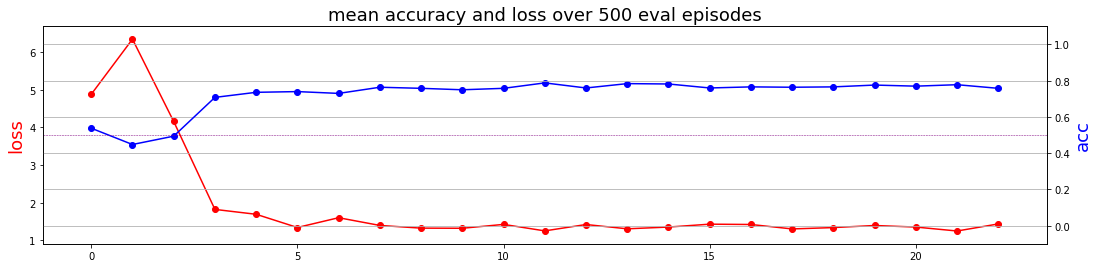

### plot train data

In [113]:
for nback in nbackL:
  mdirL = glob('models/sweep_N/st*nback_%i/*/'%(nback))
  nmodels = len(mdirL)
  print(nback,nmodels)
  fig,axarr = plt.subplots(nmodels,1,figsize=(20,5*nmodels)); axarr = axarr.reshape(-1)
  for ax,fpath in zip(axarr,mdirL):
    midx = int(fpath.split('/')[-2])
    fpath_loss = glob(fpath + 'train_loss*')[0]
    fpath_acc = glob(fpath + 'train_acc*')[0]
    train_loss = np.load(fpath_loss)
    train_acc = np.load(fpath_acc)
    plt_loss_acc(train_loss,train_acc,ax=ax)
  plt.savefig('figures/sweep_N/train_plots/nback_%i'%nback)
  plt.close('all')

1 9
2 8
3 9
4 8
5 8
6 8
7 8
8 9
9 7
10 8
